In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data =  pd.read_csv('mymoviedb.csv', engine='python')
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [4]:
# Change Release_Date into Date Format
# Change Vote_Count to Integer
# Change Vote_Average to Float

In [5]:
# Null entries in data & duplicates entries in data.
data.isnull().sum().sum()

80

In [6]:
data.duplicated().sum()

0

In [7]:
# Change Release_Date into Date Format
from datetime import date
data['Release_Date'] = pd.to_datetime(data['Release_Date'], errors='coerce')
data['Release_Year'] = data['Release_Date'].dt.year
data['Release_Year'].head()

,Release_Year
0,2021.0
1,2022.0
2,2022.0
3,2021.0
4,2021.0


In [8]:
# Replace None values with 0 and non-numeric values with -1 before converting to int
data['Vote_Count'] = pd.to_numeric(data['Vote_Count'], errors='coerce').fillna(0).astype(int)
# Convert 'Vote_Average' to float, handling potential errors
data['Vote_Average'] = pd.to_numeric(data['Vote_Average'], errors='coerce').astype(float)
# Convert 'Release_Year' to numeric, handle errors, and fill NaNs with a placeholder
data['Release_Year'] = pd.to_numeric(data['Release_Year'], errors='coerce').fillna(-1).astype(int)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9837 non-null   int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
 9   Release_Year       9837 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 768.6+ KB


**Exploration Summary**
1. we have a dataframe consisting of 9827 rows and 9 columns.
2. Our dataset looks a bit tidy with no NaNs nor duplicated values.
3. Release Date column needs to be casted into date time and to extract only the year value.
4. Overview, Original_Languege and Poster-Url wouldn't be so useful during analysis, so we'll drop them.
5. There is noticable outliers in Popularity column.  
6. Vote Average bettter be categorised for proper analysis.
7. Genre column has comma-saperated values and white spaces that needs to be handled and casted into category.

In [10]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [11]:
data.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average,Release_Year
count,9827,9827.000000,9837.000000,9826.000000,9837.000000
mean,2006-09-23 11:05:51.317797888,40.320570,1391.386093,6.439467,2004.163159
min,1902-04-17 00:00:00,7.100000,0.000000,0.000000,-1.000000
25%,2000-10-18 00:00:00,16.127500,146.000000,5.900000,2000.000000
50%,2011-09-13 00:00:00,21.191000,443.000000,6.500000,2011.000000
75%,2017-11-22 00:00:00,35.174500,1375.000000,7.100000,2017.000000
max,2024-07-03 00:00:00,5083.954000,31077.000000,10.000000,2024.000000
std,NaN,108.874308,2610.258502,1.129797,65.860944


Dropping the columns

In [12]:
data.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Release_Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [13]:
drop_col = ['Overview', 'Release_Date', 'Original_Language', 'Poster_Url'] # Removed the trailing tab character from 'Overview'
data.drop(drop_col, axis=1, inplace=True)

In [14]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,6.3,Thriller,2022
3,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",2021


**categorizing Vote_Average column**

We would cut the vote_Average values and make 4 categories: popular average below_avg not_popular to describe it more using catigorize_col() function
provided above.

In [22]:
def categorize_col(data, col, labels):
  edges = [data[col].describe()['min'],
           data[col].describe()['25%'],
           data[col].describe()['50%'],
           data[col].describe()['75%'],
           data[col].describe()['max']]
  data[col] = pd.cut(data[col], edges, labels=labels, duplicates='drop', include_lowest=True)
  return data

In [24]:
# Provide 4 labels to match the 5 edges (bins) created in categorize_col
labels = ['low', 'medium', 'high', 'very_high']
categorize_col (data, 'Vote_Average', labels)
data['Vote_Average'].unique()

['very_high', 'medium', 'high', 'low', NaN]
Categories (4, object): ['low' < 'medium' < 'high' < 'very_high']

In [25]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,very_high,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,very_high,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,medium,Thriller,2022
3,Encanto,2402.201,5076,very_high,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,high,"Action, Adventure, Thriller, War",2021


In [26]:
data['Vote_Average'].value_counts()

,count
Vote_Average,
low,2567
very_high,2450
high,2411
medium,2398


In [27]:
data.dropna(inplace=True)

In [28]:
data.isna().sum()

,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0
Release_Year,0


In [29]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,very_high,"Action, Adventure, Science Fiction",2021
1,The Batman,3827.658,1151,very_high,"Crime, Mystery, Thriller",2022
2,No Exit,2618.087,122,medium,Thriller,2022
3,Encanto,2402.201,5076,very_high,"Animation, Comedy, Family, Fantasy",2021
4,The King's Man,1895.511,1793,high,"Action, Adventure, Thriller, War",2021


**Splitting the jonour into list**

In [31]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre').reset_index(drop=True)
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,very_high,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,very_high,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,very_high,Science Fiction,2021
3,The Batman,3827.658,1151,very_high,Crime,2022
4,The Batman,3827.658,1151,very_high,Mystery,2022


**Casting genre into category**

In [33]:
data['Genre'] = data['Genre'].astype('category')
data['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25792 entries, 0 to 25791
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Title         25792 non-null  object  
 1   Popularity    25792 non-null  float64 
 2   Vote_Count    25792 non-null  int64   
 3   Vote_Average  25792 non-null  category
 4   Genre         25792 non-null  category
 5   Release_Year  25792 non-null  int64   
dtypes: category(2), float64(1), int64(2), object(1)
memory usage: 857.4+ KB


In [35]:
data.nunique()

,0
Title,9512
Popularity,8159
Vote_Count,3266
Vote_Average,4
Genre,19
Release_Year,102


In [36]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,very_high,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,very_high,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,very_high,Science Fiction,2021
3,The Batman,3827.658,1151,very_high,Crime,2022
4,The Batman,3827.658,1151,very_high,Mystery,2022


# Data Visualization

In [37]:
sns.set_style('whitegrid')

# Most frequently genre of movie in Netflix



In [38]:
data['Genre'].describe()

,Genre
count,25792
unique,19
top,Drama
freq,3744


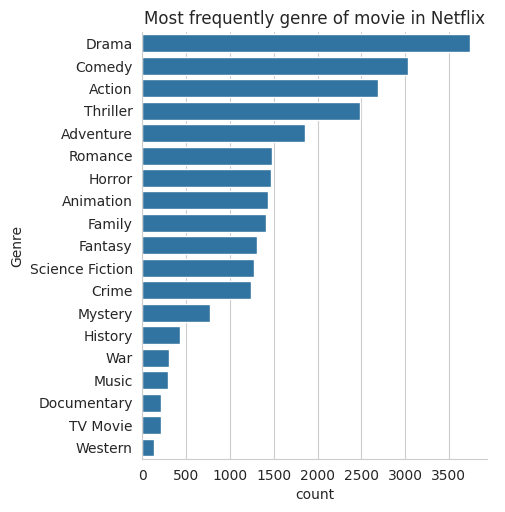

In [39]:
sns.catplot(y = 'Genre', data = data, kind = 'count', order=data['Genre'].value_counts().index)
plt.title('Most frequently genre of movie in Netflix')
plt.show()

# Highest vote in vote average column

In [40]:
data.head()

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,very_high,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,very_high,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,very_high,Science Fiction,2021
3,The Batman,3827.658,1151,very_high,Crime,2022
4,The Batman,3827.658,1151,very_high,Mystery,2022


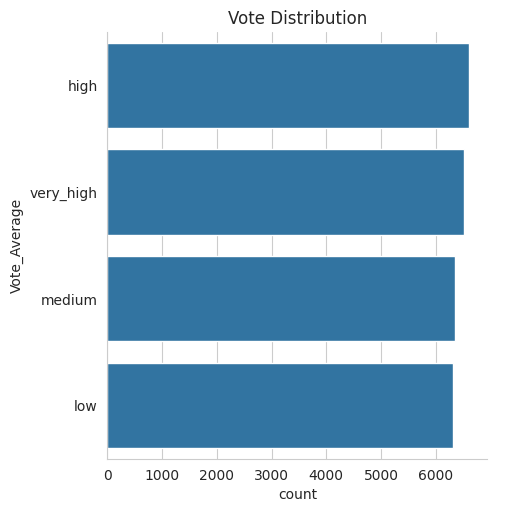

In [42]:
sns.catplot(y = 'Vote_Average', data = data, kind = 'count', order = data['Vote_Average'].value_counts().index)
plt.title('Vote Distribution')
plt.show()

# Movie with highest popularity & its genre

In [43]:
data[data['Popularity'] == data['Popularity'].max()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
0,Spider-Man: No Way Home,5083.954,8940,very_high,Action,2021
1,Spider-Man: No Way Home,5083.954,8940,very_high,Adventure,2021
2,Spider-Man: No Way Home,5083.954,8940,very_high,Science Fiction,2021


# Movie with lowest popularity & its genre

In [44]:
data[data['Popularity'] == data['Popularity'].min()]

,Title,Popularity,Vote_Count,Vote_Average,Genre,Release_Year
25786,The United States vs. Billie Holiday,13.354,152,high,Music,2021
25787,The United States vs. Billie Holiday,13.354,152,high,Drama,2021
25788,The United States vs. Billie Holiday,13.354,152,high,History,2021
25789,Threads,13.354,186,very_high,War,1984
25790,Threads,13.354,186,very_high,Drama,1984
25791,Threads,13.354,186,very_high,Science Fiction,1984


# Most movie flimed in year

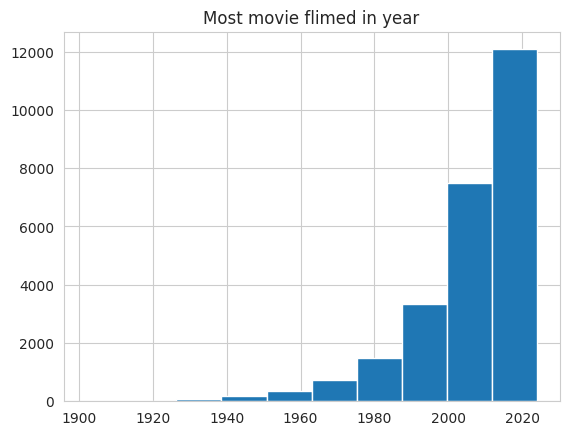

In [45]:
data['Release_Year'].hist()
plt.title('Most movie flimed in year')
plt.show()